In [ ]:
%matplotlib inline


# 1D Screened optimal transport


This example illustrates the computation of Screenkhorn: Screening Sinkhorn Algorithm for Optimal transport.



In [13]:
# Author: Mokhtar Z. Alaya <mokhtarzahdi.alaya@gmail.com>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss
from ot.bregman import screenkhorn

Generate data
-------------



In [14]:
#%% parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

Plot distributions and loss matrix
----------------------------------



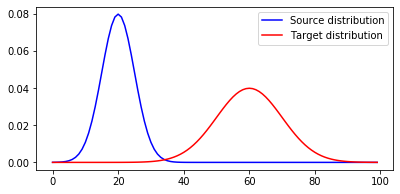

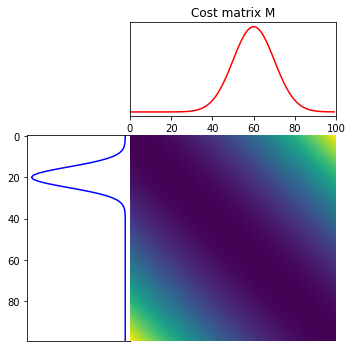

In [15]:
#%% plot the distributions

pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

# plot distributions and loss matrix

pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

Solve Screened Sinkhorn
--------------



Epsilon = 0.014767606916367452

Kappa = 3.3854408965782907

|I_active| = 30 	 |J_active| = 30 


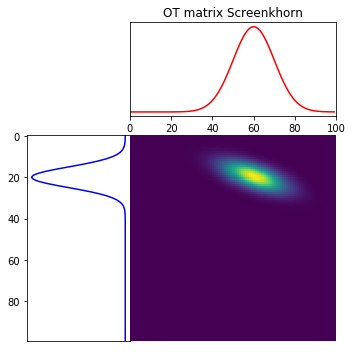

In [21]:
# Screenkhorn

lambd = 1e-2 # entropy parameter
ns_budget = 30 # budget number of points to be keeped in the source distribution
nt_budget = 30 # budget number of points to be keeped in the target distribution

Gsc = screenkhorn(a, b, M, lambd, ns_budget, nt_budget, uniform=False, restricted=True, verbose=True)
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Screenkhorn')

pl.show()